# Assignmet 6B - Hasanat Hasan

## Problem 1 (50 points): Laplace’s Equation in a Box
### An empty square box has conducting walls, 1 m each. All of the walls are grounded at 0 statvolts, except for the wall at the top, which is at voltage $V = 1$ statvolt
### For the two-dimensional case, solve Laplace’s equation for the electrostatic potential φ, subject to boundary conditions $\phi = V$ on the top wall and $\phi = 0$ on the other walls

# Using the Gauss-Siedal:
$$
\phi^{n+1} = (1+\omega)F_{Jacobi}(\phi^n) - \omega\phi^n
$$

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def gauss_siedal_method(matrix_grid: np.ndarray, omega: float, tolerance: float,max_iter = 1000):
    ''' 
    Applies the gauss-sideal method to approximate the solution to poisson/laplace eq
    \phi^{n+1} = (1+\omega)F_{Jacobi}(\phi^n) - \omega\phi^n
    '''
    M,N = matrix_grid.shape
    
    for n in range(max_iter):
        matrix_prev = matrix_grid.copy()
        for i in range(1,M-1):
            for j in range(1,N-1):
                matrix_grid[i,j] = (1+omega) * 0.25 * ( matrix_grid[i+1,j] + matrix_grid[i-1,j] + matrix_grid[i,j+1] + matrix_grid[i,j-1] ) - omega * matrix_grid[i,j]
        if np.all(np.abs(matrix_grid - matrix_prev) < tolerance):
            print(f"Converged after {n} iterations")
            return matrix_grid
    return matrix_grid



Converged after 311 iterations


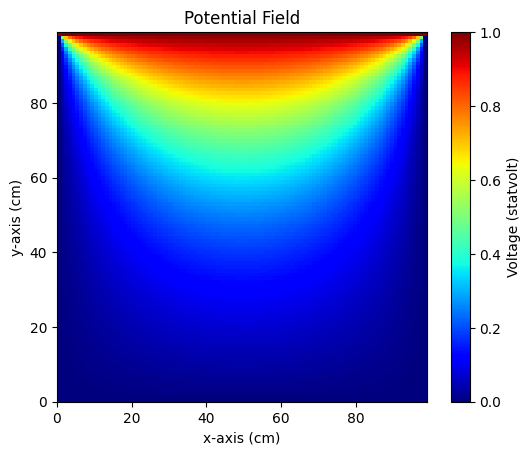

In [22]:
# Generate the grid
a = 100 # 100cm = 1m
x_axis = np.arange(0,a,1) 
y_axis = np.arange(0,a,1) 
X_mesh_array, Y_mesh_array = np.meshgrid(x_axis, y_axis)
phi_grid  = np.zeros((len(x_axis),len(y_axis)))

# Apply BC:
phi_grid[:,0] = 0 # side
phi_grid[:,-1] = 0 # side
phi_grid[-1,:] = 1 # top wall (statvolt)
phi_grid[0,:] = 0 

omega = 0.95
tolerance = 1e-6

# solve 
solution_grid = gauss_siedal_method(phi_grid,omega,tolerance)

# Plot the array Z using imshow
plt.imshow(solution_grid, cmap='jet', origin='lower', extent=[x_axis[0], x_axis[-1], y_axis[0], y_axis[-1]])  # Map array to real coordinates
plt.colorbar(label='Voltage (statvolt)')  # Add a color bar
plt.title('Potential Field')  # Title of the plot
plt.xlabel('x-axis (cm)')  # Label x-axis
plt.ylabel('y-axis (cm)')  # Label y-axis
plt.show()

### (b) Experiment with different values of the overrelaxation parameter ω to find which value gives the fastest solution. Report the optimal value of ω among those you tried 

#### Here are the times and iterations for some omega values:
- $\omega =0.7 , t = 9.1s$, iteration $ =1000 $
- $\omega =0.8, t = 8.3s$, iteration $ =919  $
- $\omega = 0.9, t =4.5s$, iteration $ = 462 $
- $\omega = 0.95, t =3.0 s$, iteration $ =311  $
#### clearly, $\omega = 0.95$ provides the fastest convergence 

### (c) Make a density plot of the final solution.

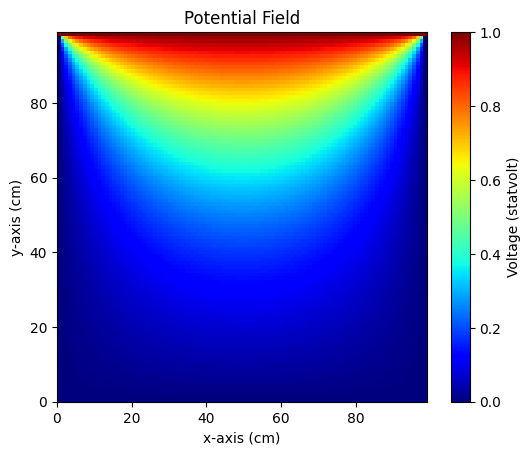

## Problem 2 (50 points): Electrostatic Potential of a Capacitor
###  For the two-dimensional case, solve Laplace’s equation for the electrostatic potential φ with boundaryconditions of φ = +1 statvolt on the positive plate, φ = −1 statvolt on the negative plate, and φ = 0 on the wall
### (a) Write a program, or modify the previous one, to solve Laplace’s equation for this problem on a grid of 100 ×100 points. Calculate the potential at each grid point to a precision of 10−6statvolt.



Converged after 218 iterations


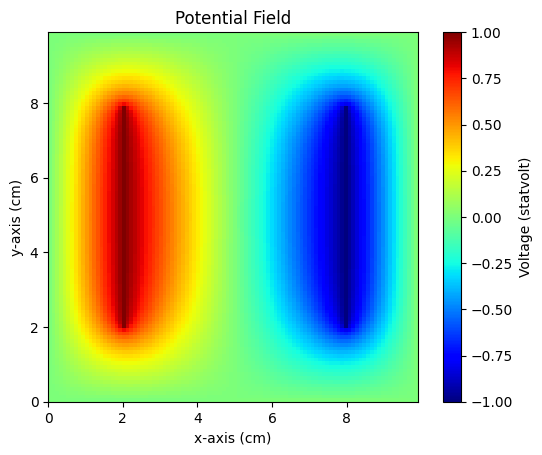

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the grid
a = 10 # 100cm = 1m
x_axis = np.arange(0,a,0.1) # x-coordinates (e.g., x_1, x_2, ..., x_N)
y_axis = np.arange(0,a,0.1)   # y-coordinates (e.g., y_1, y_2, ..., y_M)
X_mesh_array, Y_mesh_array = np.meshgrid(x_axis, y_axis)
phi_grid  = np.zeros((len(x_axis),len(y_axis)))

# apply BC:
phi_grid[:,0] = 0 # side
phi_grid[:,-1] = 0 # side
phi_grid[-1,:] = 0 # top wall 
phi_grid[-1,:] = 0 # top wall (statvolt)

omega = 0.92 
tolerance = 1e-6
max_iter = 1000
for n in range(max_iter):
    phi_old = phi_grid.copy()
    for i in range(1,len(x_axis)-1):
        for j in range(1,len(x_axis)-1):
            phi_grid[i,j] = (1+omega) * 0.25 * ( phi_grid[i+1,j] + phi_grid[i-1,j] + phi_grid[i,j+1] + phi_grid[i,j-1] ) - omega * phi_grid[i,j]
            # insert capacitor plates
            phi_grid[20:80, 20] = 1
            phi_grid[20:80, 80] = -1
    if np.all(np.abs(phi_grid - phi_old) < tolerance):
        print(f"Converged after {n} iterations")
        break
    
# Plot the array Z using imshow
plt.imshow(phi_grid, cmap='jet', origin='lower', extent=[x_axis[0], x_axis[-1], y_axis[0], y_axis[-1]])  # Map array to real coordinates
plt.colorbar(label='Voltage (statvolt)')  # Add a color bar
plt.title('Potential Field')  # Title of the plot
plt.xlabel('x-axis (cm)')  # Label x-axis
plt.ylabel('y-axis (cm)')  # Label y-axis
plt.show()

### (b) Make a density plot of the resulting potential.
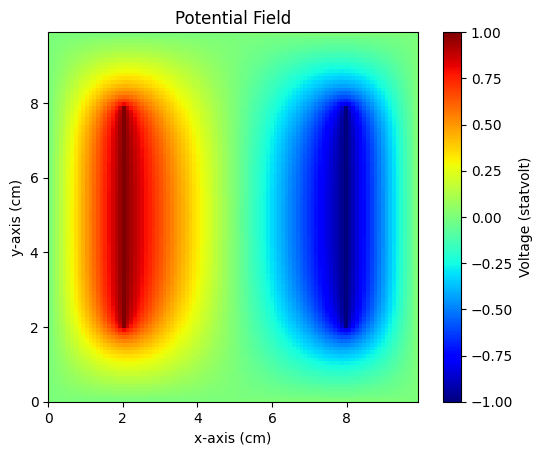